In [155]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv, SAGEConv, GATConv
import torch.nn as nn
import matplotlib.pyplot as plt


In [156]:
import random
import torch

def set_seed(seed):
    random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

In [ ]:
dataset = Planetoid(root='.', name='Cora')

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.5):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels, add_self_loops=True)
        self.conv2 = GCNConv(hidden_channels, hidden_channels, add_self_loops=True)
        self.fc = torch.nn.Linear(hidden_channels, out_channels)
        self.fc0 = torch.nn.Linear(hidden_channels, hidden_channels)
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.leaky_relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.leaky_relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.fc(x)
        return x

class GraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.5):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels, aggr='max')
        self.conv2 = SAGEConv(hidden_channels, hidden_channels, aggr='max')
        self.fc = torch.nn.Linear(hidden_channels, out_channels)
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.leaky_relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.leaky_relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.fc(x)
        return x

class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.6, heads=8):
        super().__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads, dropout=dropout)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1, concat=False, dropout=dropout)
        self.fc = torch.nn.Linear(hidden_channels, out_channels)
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.gat1(x, edge_index)
        x = F.leaky_relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.gat2(x, edge_index)
        x = F.leaky_relu(x)
        x = self.fc(x)
        return x

class GCNSkip1(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.5):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels, add_self_loops=True)
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels, add_self_loops=True)
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels, add_self_loops=True)
        self.bn3 = nn.BatchNorm1d(hidden_channels)
        self.conv4 = GCNConv(hidden_channels, hidden_channels, add_self_loops=True)
        self.bn4 = nn.BatchNorm1d(hidden_channels)
        self.fc = nn.Linear(hidden_channels, out_channels)
        self.dropout = dropout

    def forward(self, x, edge_index):
        x1 = self.conv1(x, edge_index)
        x1 = self.bn1(x1)
        x1 = F.leaky_relu(x1)
        x1 = F.dropout(x1, p=self.dropout, training=self.training)
        x2 = self.conv2(x1, edge_index)
        x2 = self.bn2(x2)
        x2 = F.leaky_relu(x2)
        x2 = F.dropout(x2, p=self.dropout, training=self.training)
        x2 = x2 + x1
        x3 = self.conv3(x2, edge_index)
        x3 = self.bn3(x3)
        x3 = F.leaky_relu(x3)
        x3 = F.dropout(x3, p=self.dropout, training=self.training)
        x3 = x3 + x2
        x4 = self.conv4(x3, edge_index)
        x4 = self.bn4(x4)
        x4 = F.leaky_relu(x4)
        x4 = F.dropout(x4, p=self.dropout, training=self.training)
        x4 = x4 + x3
        x = self.fc(x4)
        return x

class GCNSkip3(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.5):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels, add_self_loops=True)
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels, add_self_loops=True)
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels, add_self_loops=True)
        self.bn3 = nn.BatchNorm1d(hidden_channels)
        self.conv4 = GCNConv(hidden_channels, hidden_channels, add_self_loops=True)
        self.bn4 = nn.BatchNorm1d(hidden_channels)
        self.fc = torch.nn.Linear(hidden_channels, out_channels)
        self.dropout = dropout

    def forward(self, x, edge_index):
        x1 = self.conv1(x, edge_index)
        x1 = self.bn1(x1)
        x1 = F.leaky_relu(x1)
        x1 = F.dropout(x1, p=self.dropout, training=self.training)
        x2 = self.conv2(x1, edge_index)
        x2 = self.bn2(x2)
        x2 = F.leaky_relu(x2)
        x2 = F.dropout(x2, p=self.dropout, training=self.training)
        x3 = self.conv3(x2, edge_index)
        x3 = self.bn3(x3)
        x3 = F.leaky_relu(x3)
        x3 = F.dropout(x3, p=self.dropout, training=self.training)
        x4 = self.conv4(x3, edge_index)
        x4 = self.bn4(x4)
        x4 = F.leaky_relu(x4)
        x4 = F.dropout(x4, p=self.dropout, training=self.training)
        x = x1 + x4 + x2 + x3
        x = self.fc(x)
        return x

model_gcn = GCN(dataset.num_features, 32, dataset.num_classes)
model_sage = GraphSAGE(dataset.num_features, 32, dataset.num_classes)
model_gat = GAT(dataset.num_features, 32, dataset.num_classes)
model_skip1 = GCNSkip1(dataset.num_features, 32, dataset.num_classes)
model_skip3 = GCNSkip3(dataset.num_features, 32, dataset.num_classes)

optimizer_gcn = torch.optim.Adam(model_gcn.parameters(), lr=0.01, weight_decay=5e-4)
optimizer_sage = torch.optim.Adam(model_sage.parameters(), lr=0.01, weight_decay=5e-4)
optimizer_gat = torch.optim.Adam(model_gat.parameters(), lr=0.01, weight_decay=5e-4)
optimizer_skip1 = torch.optim.Adam(model_skip1.parameters(), lr=0.01, weight_decay=5e-4)
optimizer_skip3 = torch.optim.Adam(model_skip3.parameters(), lr=0.01, weight_decay=5e-4)

criterion = torch.nn.CrossEntropyLoss()
epochs = 200

In [158]:
data = dataset[0]

In [159]:
train_mask = data.train_mask
test_mask = data.test_mask
val_mask = data.val_mask

In [160]:
verbose=1

In [161]:
train_accs_gcn = []
val_accs_gcn = []
print("Training GCN Model")
for epoch in range(1, epochs+1):
    model_gcn.train()
    optimizer_gcn.zero_grad()
    pred = model_gcn(data.x, data.edge_index)
    loss = criterion(pred[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer_gcn.step()
    model_gcn.eval()
    with torch.no_grad():
        pred_train = model_gcn(data.x, data.edge_index)
        train_acc = (pred_train[data.train_mask].argmax(dim=1) == data.y[data.train_mask]).float().mean().item()
        pred_val = model_gcn(data.x, data.edge_index)
        val_acc = (pred_val[data.val_mask].argmax(dim=1) == data.y[data.val_mask]).float().mean().item()
    train_accs_gcn.append(train_acc)
    val_accs_gcn.append(val_acc)
    if epoch % 10 == 0:
        print(f"GCN Epoch: {epoch}; Training loss: {loss.item():.4f}; Training acc: {train_acc:.4f}; Val acc: {val_acc:.4f}")

train_accs_sage = []
val_accs_sage = []
print("\nTraining GraphSAGE Model")
for epoch in range(1, epochs+1):
    model_sage.train()
    optimizer_sage.zero_grad()
    pred = model_sage(data.x, data.edge_index)
    loss = criterion(pred[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer_sage.step()
    model_sage.eval()
    with torch.no_grad():
        pred_train = model_sage(data.x, data.edge_index)
        train_acc = (pred_train[data.train_mask].argmax(dim=1) == data.y[data.train_mask]).float().mean().item()
        pred_val = model_sage(data.x, data.edge_index)
        val_acc = (pred_val[data.val_mask].argmax(dim=1) == data.y[data.val_mask]).float().mean().item()
    train_accs_sage.append(train_acc)
    val_accs_sage.append(val_acc)
    if epoch % 10 == 0:
        print(f"GraphSAGE Epoch: {epoch}; Training loss: {loss.item():.4f}; Training acc: {train_acc:.4f}; Val acc: {val_acc:.4f}")

train_accs_gat = []
val_accs_gat = []
print("\nTraining GAT Model")
for epoch in range(1, epochs+1):
    model_gat.train()
    optimizer_gat.zero_grad()
    pred = model_gat(data.x, data.edge_index)
    loss = criterion(pred[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer_gat.step()
    model_gat.eval()
    with torch.no_grad():
        pred_train = model_gat(data.x, data.edge_index)
        train_acc = (pred_train[data.train_mask].argmax(dim=1) == data.y[data.train_mask]).float().mean().item()
        pred_val = model_gat(data.x, data.edge_index)
        val_acc = (pred_val[data.val_mask].argmax(dim=1) == data.y[data.val_mask]).float().mean().item()
    train_accs_gat.append(train_acc)
    val_accs_gat.append(val_acc)
    if epoch % 10 == 0:
        print(f"GAT Epoch: {epoch}; Training loss: {loss.item():.4f}; Training acc: {train_acc:.4f}; Val acc: {val_acc:.4f}")

train_accs_skip1 = []
val_accs_skip1 = []
print("\nTraining GCNSkip1 Model")
for epoch in range(1, epochs+1):
    model_skip1.train()
    optimizer_skip1.zero_grad()
    pred = model_skip1(data.x, data.edge_index)
    loss = criterion(pred[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer_skip1.step()
    model_skip1.eval()
    with torch.no_grad():
        pred_train = model_skip1(data.x, data.edge_index)
        train_acc = (pred_train[data.train_mask].argmax(dim=1) == data.y[data.train_mask]).float().mean().item()
        pred_val = model_skip1(data.x, data.edge_index)
        val_acc = (pred_val[data.val_mask].argmax(dim=1) == data.y[data.val_mask]).float().mean().item()
    train_accs_skip1.append(train_acc)
    val_accs_skip1.append(val_acc)
    if epoch % 10 == 0:
        print(f"GCNSkip1 Epoch: {epoch}; Training loss: {loss.item():.4f}; Training acc: {train_acc:.4f}; Val acc: {val_acc:.4f}")

train_accs_skip3 = []
val_accs_skip3 = []
print("\nTraining GCNSkip3 Model")
for epoch in range(1, epochs+1):
    model_skip3.train()
    optimizer_skip3.zero_grad()
    pred = model_skip3(data.x, data.edge_index)
    loss = criterion(pred[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer_skip3.step()
    model_skip3.eval()
    with torch.no_grad():
        pred_train = model_skip3(data.x, data.edge_index)
        train_acc = (pred_train[data.train_mask].argmax(dim=1) == data.y[data.train_mask]).float().mean().item()
        pred_val = model_skip3(data.x, data.edge_index)
        val_acc = (pred_val[data.val_mask].argmax(dim=1) == data.y[data.val_mask]).float().mean().item()
    train_accs_skip3.append(train_acc)
    val_accs_skip3.append(val_acc)
    if epoch % 10 == 0:
        print(f"GCNSkip3 Epoch: {epoch}; Training loss: {loss.item():.4f}; Training acc: {train_acc:.4f}; Val acc: {val_acc:.4f}")

Training GCN Model
GCN Epoch: 10; Training loss: 1.3352; Training acc: 0.9786; Val acc: 0.7080
GCN Epoch: 20; Training loss: 0.3574; Training acc: 0.9929; Val acc: 0.7560
GCN Epoch: 30; Training loss: 0.1646; Training acc: 1.0000; Val acc: 0.7780
GCN Epoch: 40; Training loss: 0.0808; Training acc: 1.0000; Val acc: 0.7600
GCN Epoch: 50; Training loss: 0.0624; Training acc: 1.0000; Val acc: 0.7620
GCN Epoch: 60; Training loss: 0.1014; Training acc: 1.0000; Val acc: 0.7560
GCN Epoch: 70; Training loss: 0.0705; Training acc: 1.0000; Val acc: 0.7520
GCN Epoch: 80; Training loss: 0.0561; Training acc: 1.0000; Val acc: 0.7600
GCN Epoch: 90; Training loss: 0.0528; Training acc: 1.0000; Val acc: 0.7560
GCN Epoch: 100; Training loss: 0.0453; Training acc: 1.0000; Val acc: 0.7560
GCN Epoch: 110; Training loss: 0.0480; Training acc: 1.0000; Val acc: 0.7480
GCN Epoch: 120; Training loss: 0.0466; Training acc: 1.0000; Val acc: 0.7380
GCN Epoch: 130; Training loss: 0.0209; Training acc: 1.0000; Val a

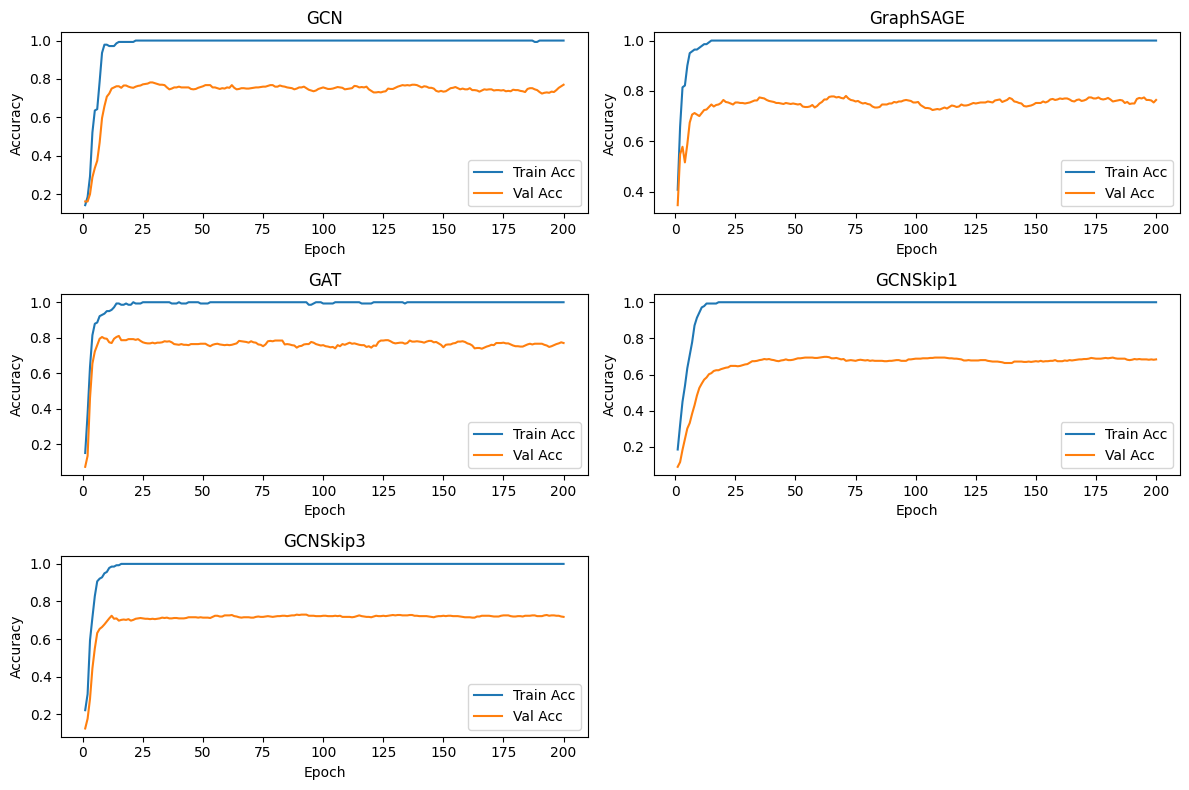

In [162]:
plt.figure(figsize=(12,8))
plt.subplot(3,2,1)
plt.plot(range(1, epochs+1), train_accs_gcn, label='Train Acc')
plt.plot(range(1, epochs+1), val_accs_gcn, label='Val Acc')
plt.title('GCN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(3,2,2)
plt.plot(range(1, epochs+1), train_accs_sage, label='Train Acc')
plt.plot(range(1, epochs+1), val_accs_sage, label='Val Acc')
plt.title('GraphSAGE')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(3,2,3)
plt.plot(range(1, epochs+1), train_accs_gat, label='Train Acc')
plt.plot(range(1, epochs+1), val_accs_gat, label='Val Acc')
plt.title('GAT')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(3,2,4)
plt.plot(range(1, epochs+1), train_accs_skip1, label='Train Acc')
plt.plot(range(1, epochs+1), val_accs_skip1, label='Val Acc')
plt.title('GCNSkip1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(3,2,5)
plt.plot(range(1, epochs+1), train_accs_skip3, label='Train Acc')
plt.plot(range(1, epochs+1), val_accs_skip3, label='Val Acc')
plt.title('GCNSkip3')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [163]:
model_gcn.eval()
with torch.no_grad():
    logits_gcn = model_gcn(data.x, data.edge_index)
    test_preds_gcn = logits_gcn[data.test_mask].argmax(dim=1)
    test_acc_gcn = (test_preds_gcn == data.y[data.test_mask]).float().mean().item()
print(f"GCN Test Accuracy: {test_acc_gcn:.4f}")

model_sage.eval()
with torch.no_grad():
    logits_sage = model_sage(data.x, data.edge_index)
    test_preds_sage = logits_sage[data.test_mask].argmax(dim=1)
    test_acc_sage = (test_preds_sage == data.y[data.test_mask]).float().mean().item()
print(f"GraphSAGE Test Accuracy: {test_acc_sage:.4f}")

model_gat.eval()
with torch.no_grad():
    logits_gat = model_gat(data.x, data.edge_index)
    test_preds_gat = logits_gat[data.test_mask].argmax(dim=1)
    test_acc_gat = (test_preds_gat == data.y[data.test_mask]).float().mean().item()
print(f"GAT Test Accuracy: {test_acc_gat:.4f}")

model_skip1.eval()
with torch.no_grad():
    logits = model_skip1(data.x, data.edge_index)
    test_preds = logits[data.test_mask].argmax(dim=1)
    test_acc = (test_preds == data.y[data.test_mask]).float().mean().item()
print(f"GCNSkip1 Test Accuracy: {test_acc:.4f}")


model_skip3.eval()
with torch.no_grad():
    logits = model_skip3(data.x, data.edge_index)
    test_preds = logits[data.test_mask].argmax(dim=1)
    test_acc = (test_preds == data.y[data.test_mask]).float().mean().item()
print(f"GCNSkip3 Test Accuracy: {test_acc:.4f}")

GCN Test Accuracy: 0.8000
GraphSAGE Test Accuracy: 0.7710
GAT Test Accuracy: 0.8080
GCNSkip1 Test Accuracy: 0.7210
GCNSkip3 Test Accuracy: 0.7430
